In [1]:
from qiskit import *
import matplotlib.pyplot as plt
import numpy as np
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram


IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibm_osaka')

C:\Users\caleb\AppData\Local\Temp\ipykernel_2420\189864558.py:9: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


In [25]:
oracle = QuantumCircuit(2, name='oracle')
oracle.cz(0,1)
oracle.to_gate()

reflection = QuantumCircuit(2, name="reflection")
reflection.h([0,1])
reflection.z([0,1])
reflection.cz(0,1)
reflection.h([0,1])
reflection.to_gate()

Instruction(name='reflection', num_qubits=2, num_clbits=0, params=[])

Job Status: job has successfully run


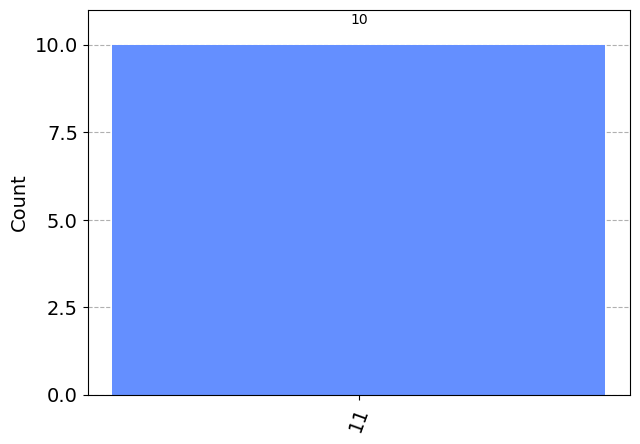

In [26]:

grover_circ = QuantumCircuit(2,2)
grover_circ.h([0,1])
grover_circ.append(oracle, [0,1])
grover_circ.append(reflection, [0,1])
grover_circ.measure([0,1],[0,1])
job = execute(grover_circ, backend,shots=10)

from qiskit.tools.monitor import job_monitor
job_monitor(job)
result = job.result()
counts =result.get_counts()
plot_histogram(counts)
